# **Perkenalan**

Nama : Agus Susanto

Batch : RMT-26

Objective : Membuat model computer vision dengan deep learning untuk melakukan prediksi penyakit pada daun jagung

# **Import Libraries**

In [57]:
#Common Library
from pathlib import Path
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from filecmp import cmp
from PIL import Image

#Tensorflow library
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# **Data Loading**

In [3]:
#Koneksi kaggle
!mkdir ~/.kaggle

!cp 'kaggle.json' ~/.kaggle
!ls ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json


In [4]:
#Download dataset dari kaggle

!kaggle datasets download -d abdelrahmanemad2199/corn-or-maize-leaf-disease-dataset

 89% 145M/163M [00:01<00:00, 132MB/s]
100% 163M/163M [00:01<00:00, 121MB/s]


In [5]:
#Ekstrak file dari kaggle
!unzip -q /content/corn-or-maize-leaf-disease-dataset.zip -d images

In [6]:
#mengecek isi dir di dalam folder main_path

main_path= '/content/images/corn/data'
list_dir = os.listdir(main_path)
print(list_dir)

['Blight', 'Common_Rust', 'Healthy', 'Gray_Leaf_Spot']


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Melihat total dataset per folder
for i in list_dir:
  num_data= len(os.listdir(os.path.join(main_path, i)))
  print(f'jumlah {i} : {num_data}')

jumlah Blight : 2743
jumlah Common_Rust : 3576
jumlah Healthy : 3476
jumlah Gray_Leaf_Spot : 2565


In [35]:
#Path file

blight_files = glob.glob('/content/images/corn/data/Blight/*')
common_Rust_files = glob.glob('/content/images/corn/data/Common_Rust/*')
healthy_files = glob.glob('/content/images/corn/data/Healthy/*')
gray_Leaf_Spot_files = glob.glob('/content/images/corn/data/Gray_Leaf_Spot/*')

In [22]:
def random_sample(image_files, num_samples=6):
  '''
  Fungsi untuk mengambil random data dari folder
  '''
  random_files= random.sample(image_files, num_samples)
  return random_files

In [89]:
#Mengambil 6 random data dari folder blight
random_blight= random_sample(blight_files,num_samples=6)

#Mengambil 6 random data dari folder common_rust
random_common_Rust= random_sample(common_Rust_files,num_samples=6)

#Mengambil 6 random data dari folder gray_leaf_spot
random_gray_Leaf_Spot= random_sample(gray_Leaf_Spot_files,num_samples=6)

#Mengambil 6 random data dari folder healthy
random_healthy= random_sample(healthy_files,num_samples=6)

In [81]:
def visualize_img(random_data, labels=None):
  '''
  Fungsi memunculkan gambar dalam bentuk grafik
  '''
  fig, axes= plt.subplots(1,6, figsize=(15,12))
  for i, image_path in enumerate(random_data):

    #Load gambar
    image= plt.imread(image_path)

    #Menampilkan gambar
    axes[i].imshow(image)
    axes[i].set_title(f'{image.shape}')
    axes[i].axis('off')
  plt.show()

def display_rgb(image_files, title='Random Images'):
    '''
    Fungsi memunculkan gambar dalam bentuk grafik dan warna gray
    '''
    fig, ax = plt.subplots(1, len(image_files), figsize=(15, 5))
    fig.suptitle(title)

    for i, image_file in enumerate(image_files):
        # Load gambar
        img = Image.open(image_file)

        # Mengubah gambar menjadi grayscale
        gray_img = img.convert('L')

        # Menampilkan gambar
        ax[i].imshow(gray_img, cmap='gray')
        ax[i].axis('off')

    plt.show()

def display_hor_flip(image_files, title='Random Images'):

    '''
    Fungsi memunculkan gambar dalam bentuk grafik dan di rotate horisontal
    '''

    fig, ax = plt.subplots(2, len(image_files), figsize=(15, 5))
    fig.suptitle(title)

    for i, image_file in enumerate(image_files):

        # Load gambar
        img = Image.open(image_file)

        # Menampilkan original gambar
        ax[0, i].imshow(img)
        ax[0, i].axis('off')
        ax[0, i].set_title('Original')

        # Mengubah gambar menjadi vertikal
        flipped_img = img.transpose(Image.FLIP_TOP_BOTTOM)

        # Menampilkan hasil ubah gambar
        ax[1, i].imshow(flipped_img)
        ax[1, i].axis('off')
        ax[1, i].set_title('Vertical Flip')

    plt.show()

## **Blight**

### **Random Pictire with total pixel**

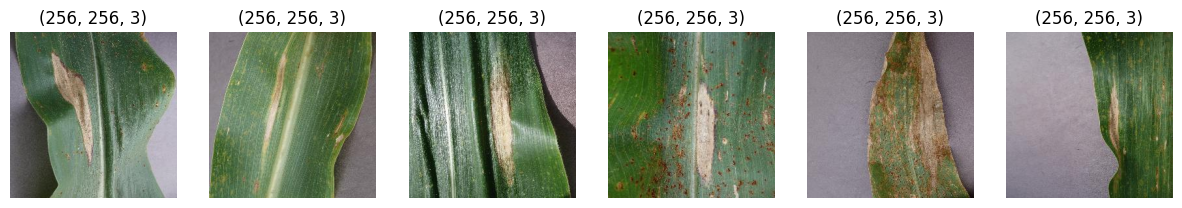

In [82]:
#Menampilkan gambar dari fungsi
visualize_img(random_blight, 'Blight')

### **Grayscale**

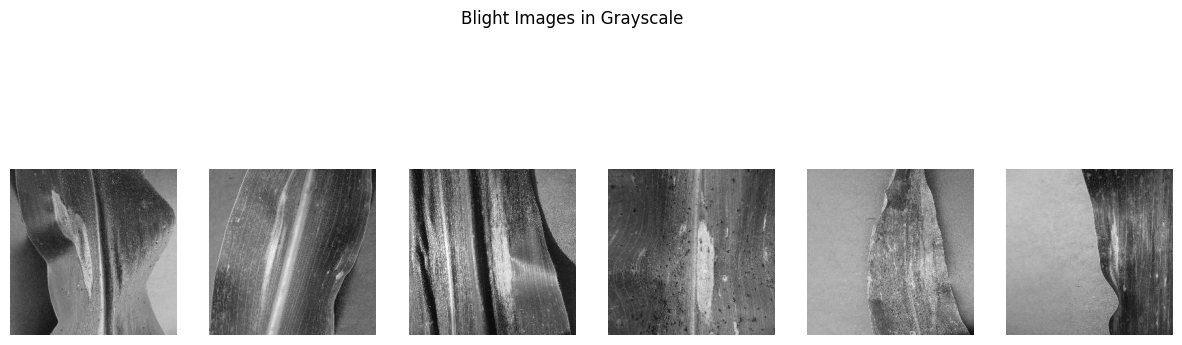

In [69]:
#Menampilkan gambar dari fungsi
display_rgb(random_blight, title='Blight Images in Grayscale')

### **Horizontal Flip**

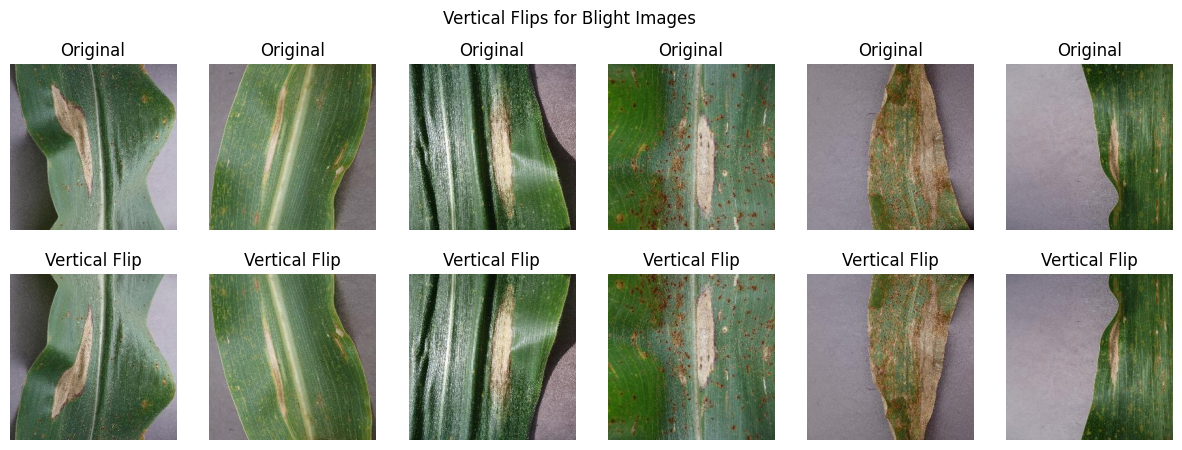

In [70]:
#Menampilkan gambar dari fungsi
display_hor_flip(random_blight, title='Vertical Flips for Blight Images')

## **Common Rust**

### **Random Pictire with total pixel**

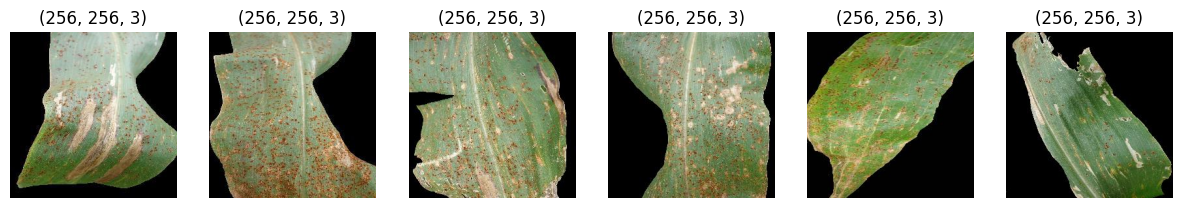

In [83]:
#Menampilkan gambar dari fungsi
visualize_img(random_common_Rust, 'Common Rust')

### **Grayscale**

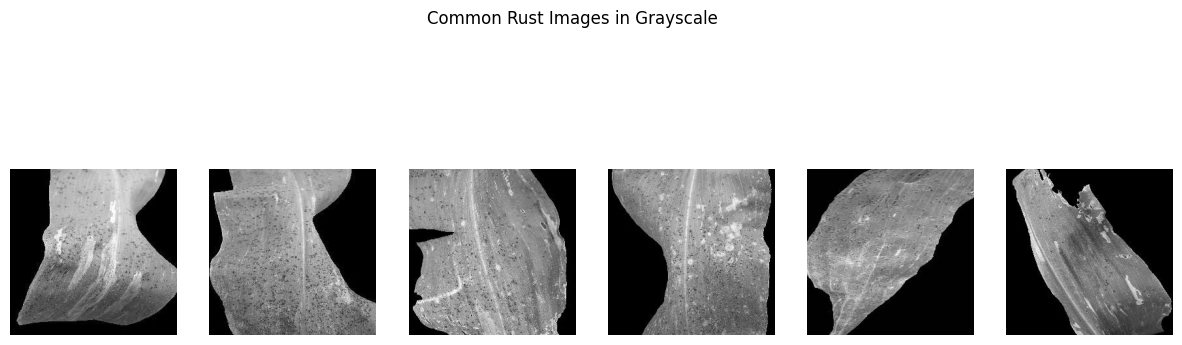

In [84]:
#Menampilkan gambar dari fungsi
display_rgb(random_common_Rust, title='Common Rust Images in Grayscale')

### **Horizontal Flip**

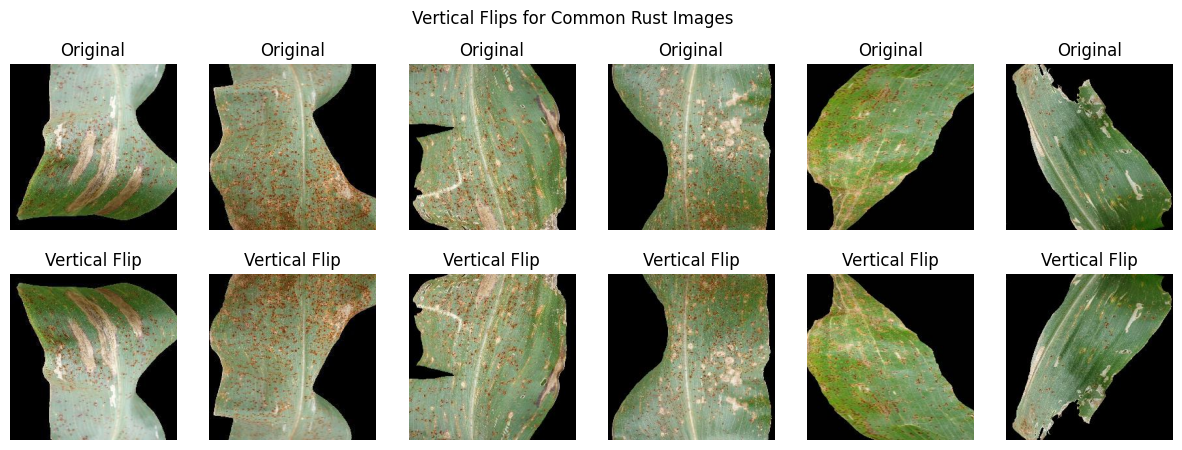

In [85]:
#Menampilkan gambar dari fungsi
display_hor_flip(random_common_Rust, title='Vertical Flips for Common Rust Images')

## **Gray Leaf Spot**

### **Random Pictire with total pixel**

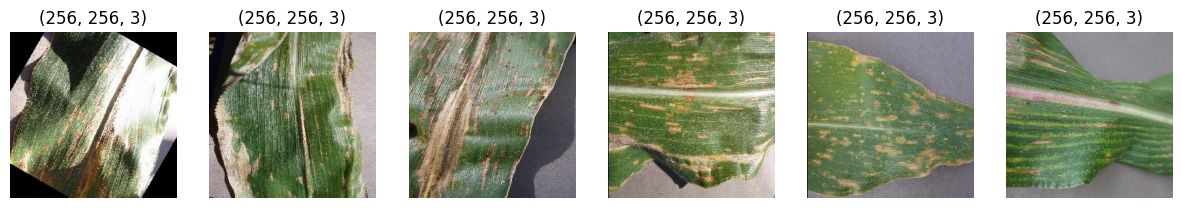

In [86]:
#Menampilkan gambar dari fungsi
visualize_img(random_gray_Leaf_Spot, 'Gray Leaf Spot')

### **Grayscale**

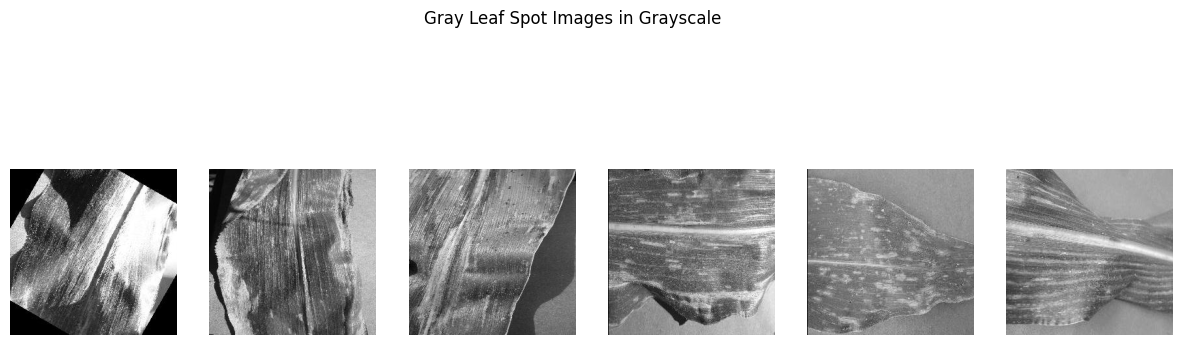

In [87]:
#Menampilkan gambar dari fungsi
display_rgb(random_gray_Leaf_Spot, title='Gray Leaf Spot Images in Grayscale')

### **Horizontal Flip**

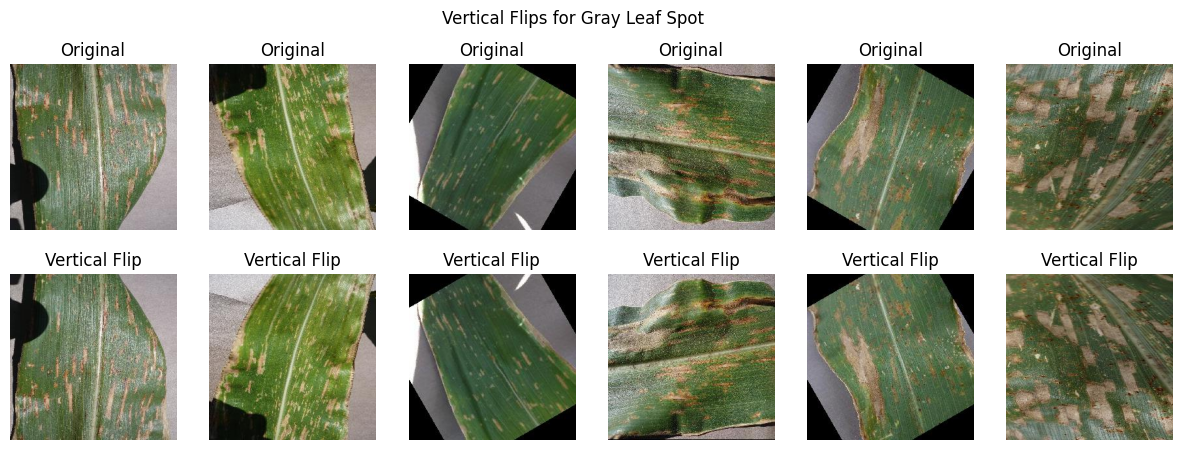

In [90]:
#Menampilkan gambar dari fungsi
display_hor_flip(random_gray_Leaf_Spot, title='Vertical Flips for Gray Leaf Spot')

## **Healthy**

### **Random Pictire with total pixel**

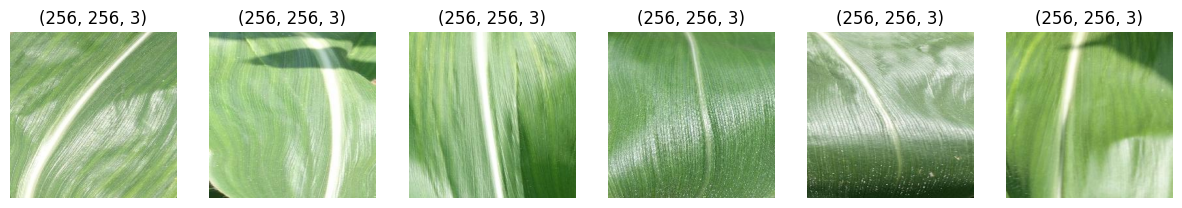

In [91]:
#Menampilkan gambar dari fungsi
visualize_img(random_healthy, 'Healthy Leaf')

### **Grayscale**

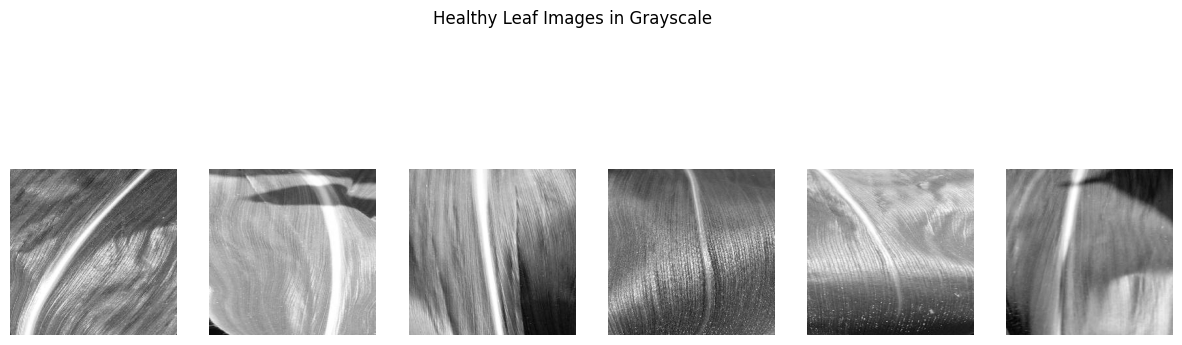

In [92]:
#Menampilkan gambar dari fungsi
display_rgb(random_healthy, title='Healthy Leaf Images in Grayscale')

### **Horizontal Flip**

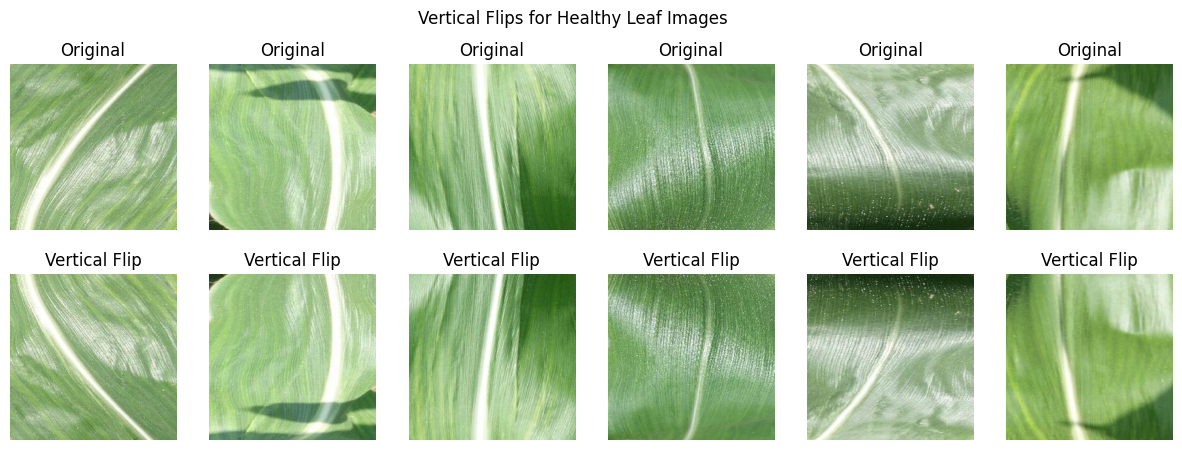

In [93]:
#Menampilkan gambar dari fungsi
display_hor_flip(random_healthy, title='Vertical Flips for Healthy Leaf Images')

## **Insight - EDA**

1. Semua kelas mempunyai pixel yang sama yaitu 256*256
2. Jika di lihat grayscale tidak terlalu dapat memunculkan perbedaan antara kelas
3. Secara keseluruhan akan ada kemungkinan kesalahan prediksi antara kelas Blight dan gray leaf spot karena mempunyai karakteristik gambar yang sama, sehingga di butuhkan augmentasi yang dapat membuat dua kelas ini terlihat berbeda
4. Selain itu ada beberapa gambar yang mempunyai disease lebih dari satu sehingga hal ini akan memungkinkan prediksi nya hanya bisa mencakup 1 class saja

# **Feature Engineering**

In [32]:
#Split gambar menjadi train dan validation
imgen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

#Train set
train = imgen.flow_from_directory(main_path,
                                  target_size=(256,256),
                                  class_mode='categorical',
                                  subset='training',shuffle=False)

# Validation set
val = imgen.flow_from_directory(main_path,
                                  target_size=(256,256),
                                  class_mode='categorical',
                                  subset='validation',shuffle=False)

Found 9889 images belonging to 4 classes.
Found 2471 images belonging to 4 classes.


In [125]:
#Melihat kelas  target
class_indices = train.class_indices
class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

# **ANN Training (Sequential API & Functional API)**

## **Model Definition**

In [94]:
#Clear Section
import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [95]:
#Ukuran gambar standar
inputs= (256, 256,3)

#Sequential untuk augmentasi
data_aug= Sequential(
    [
      layers.RandomFlip('horizontal',
                          input_shape=inputs),
      layers.RandomZoom(0.1),
    ]
)

In [96]:
#Model
model_seq = Sequential([
  data_aug,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(units=4,activation='softmax')
])

#Model compile
model_seq.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
#Summary Model

model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

## **Model Training**

In [98]:
#Training Model
epochs =8
history_1 = model_seq.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/8
310/310 [==============================] - 26s 79ms/step - loss: 1.1345 - accuracy: 0.5460 - val_loss: 0.3301 - val_accuracy: 0.8450
Epoch 2/8
310/310 [==============================] - 25s 81ms/step - loss: 0.4402 - accuracy: 0.8125 - val_loss: 0.3305 - val_accuracy: 0.8446
Epoch 3/8
310/310 [==============================] - 24s 76ms/step - loss: 0.3402 - accuracy: 0.8495 - val_loss: 0.2128 - val_accuracy: 0.9304
Epoch 4/8
310/310 [==============================] - 24s 76ms/step - loss: 0.2450 - accuracy: 0.8765 - val_loss: 0.1817 - val_accuracy: 0.9146
Epoch 5/8
310/310 [==============================] - 25s 80ms/step - loss: 0.2095 - accuracy: 0.8998 - val_loss: 0.1648 - val_accuracy: 0.9336
Epoch 6/8
310/310 [==============================] - 25s 80ms/step - loss: 0.1978 - accuracy: 0.9079 - val_loss: 0.1753 - val_accuracy: 0.9134
Epoch 7/8
310/310 [==============================] - 24s 76ms/step - loss: 0.1782 - accuracy: 0.9140 - val_loss: 0.1185 - val_accuracy: 0.9462

## **Model Evaluation**

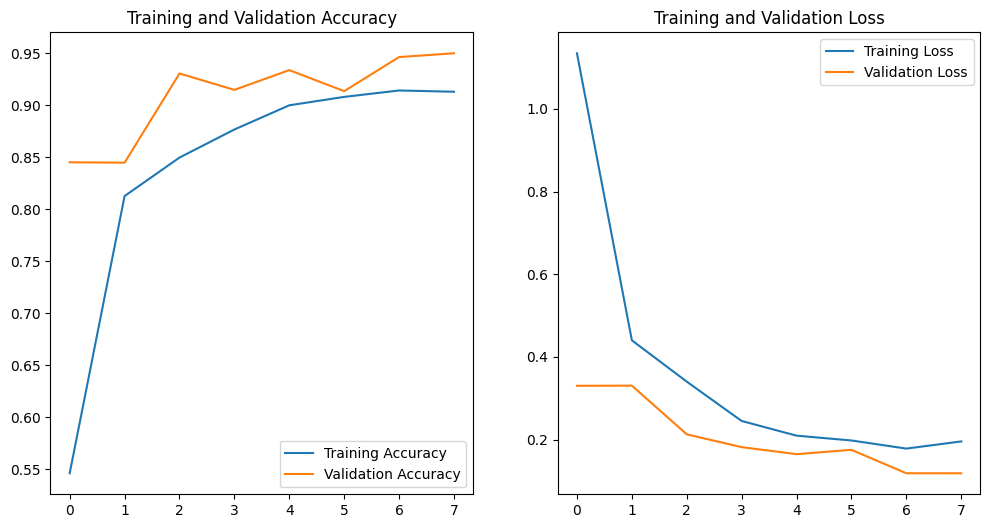

In [99]:
#Menyimpan accuracy pada train set dari hasil training dalam variabel
acc = history_1.history['accuracy']
#Menyimpan accuracy pada validation set dari hasil training dalam variabel
val_acc = history_1.history['val_accuracy']

#Menyimpan loss pada set train dari hasil training dalam variabel
loss = history_1.history['loss']

#Menyimpan loss pada val dari hasil training dalam variabel
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

#Grafik menampilkan accuracy hasil training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik menampilkan loss hasil training
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Insight ANN Training**

1. Model menunjukan performa yang baik dimana accuracy selali naik setiap epoch dan loss yang terus menurun.
2. Accuracy pada epoch terakhir adalah 0.91 pada data train dan 0.94 pada data validation.
3. Loss pada epoch terakhir adalah 0.19 pada data train dan 0.11 pada data validation, dan nilai ini cukup bagus.
4. Secara keseluruhan model ini goodfit dan mempunyai performance yang baik
5. Pada grafik accuracy nilai masih memperlihatkan kemungkinan makin naik, sehingga improvement selanjutnya akan kita tambah epoch nya
6. Selanjutnya akan kita lakukan penambahan tipe augmented untuk meningkatkan performance model
7. Untuk menghindari adanya kemungkinan overfiting nilai dropout akan di naikan menjadi 0.5
8. Akan di tambahkan early stop

# **ANN Improvement (Sequential API & Functional API)**

## **Model Definition**

In [111]:
#Clear Section
import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [112]:
#Pixel input gambar
inputs= (256, 256,3)

#Sequential untuk augmentasi
data_aug_imp = Sequential(
    [
      layers.RandomFlip('horizontal',
                          input_shape=inputs),
      layers.RandomFlip('vertical'),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1),
    ]
)

In [113]:
#Model
model_imp = Sequential([
  data_aug_imp,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(units=4,activation='softmax')
])

model_imp.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
#Callback untuk earlystopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [115]:
#Summary model
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

## **Model Training**

In [116]:
#Model Training
epochs = 30
history_imp = model_imp.fit(
    train,
    validation_data=val,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/30
310/310 [==============================] - 28s 82ms/step - loss: 1.2318 - accuracy: 0.6141 - val_loss: 0.5718 - val_accuracy: 0.8029
Epoch 2/30
310/310 [==============================] - 25s 80ms/step - loss: 0.5485 - accuracy: 0.7791 - val_loss: 0.2835 - val_accuracy: 0.8575
Epoch 3/30
310/310 [==============================] - 24s 76ms/step - loss: 0.4631 - accuracy: 0.7939 - val_loss: 0.3103 - val_accuracy: 0.8701
Epoch 4/30
310/310 [==============================] - 26s 84ms/step - loss: 0.3642 - accuracy: 0.8667 - val_loss: 0.2869 - val_accuracy: 0.8567
Epoch 5/30
310/310 [==============================] - 23s 75ms/step - loss: 0.2797 - accuracy: 0.8768 - val_loss: 0.2102 - val_accuracy: 0.9017
Epoch 6/30
310/310 [==============================] - 26s 84ms/step - loss: 0.2432 - accuracy: 0.8942 - val_loss: 0.1800 - val_accuracy: 0.9227
Epoch 7/30
310/310 [==============================] - 23s 75ms/step - loss: 0.2354 - accuracy: 0.9012 - val_loss: 0.2382 - val_accuracy:

## **Model Evaluation**

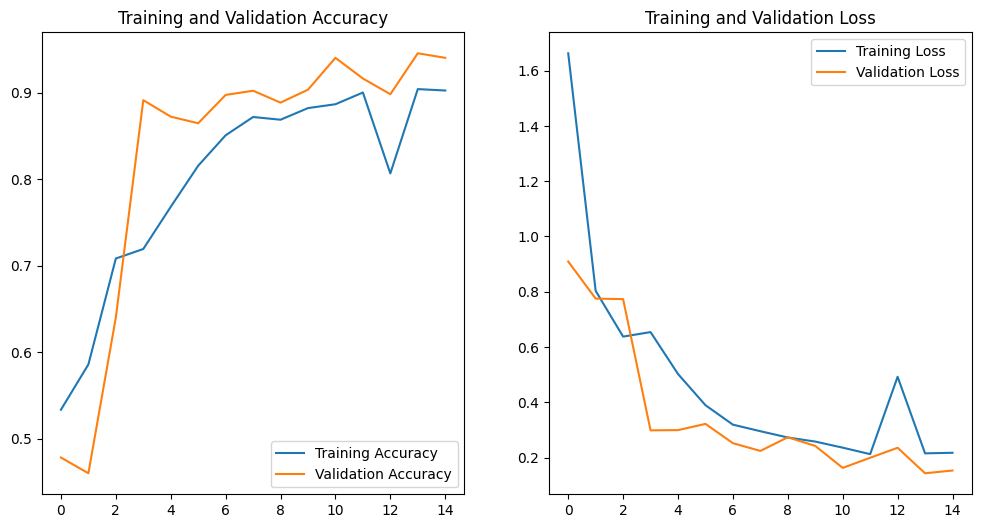

In [107]:
#Menyimpan accuracy pada train set dari hasil training dalam variabel
acc = history_imp.history['accuracy']

#Menyimpan accuracy pada validation set dari hasil training dalam variabel
val_acc = history_imp.history['val_accuracy']

#Menyimpan loss pada set train dari hasil training dalam variabel
loss = history_imp.history['loss']

#Menyimpan loss pada val dari hasil training dalam variabel
val_loss = history_imp.history['val_loss']

epochs_range = range(len(acc))

#Grafik menampilkan accuracy hasil training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik menampilkan loss hasil training
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Insight ANN Training**

1. Model menunjukan performa yang lebih baik dari pada sebelumnya dimana accuracy selali naik setiap epoch dan loss yang terus menurun.
2. Accuracy pada epoch terbaik adalah 0.91 pada data train dan 0.95 pada data validation.
3. Loss pada epoch terbaik adalah 0.18 pada data train dan 0.11 pada data validation, dan nilai ini cukup bagus.
4. Secara keseluruhan model ini goodfit dan mempunyai performance yang lebih baik dari pada model ANN Training yang pertama


# **Model Saving**

In [119]:
#save ANN Model
model_imp.save('corn_model.h5')

# **Conclusion**

1. Model secara keseluruhan menunjukan performance yang sangat bagus dengan nilai accuracy yang cukup tinggi dan loss yang cukup rendah
2. Jika di lihat pada EDA ada dua kelas yang jika di lihat mempunyai ciri-ciri gambar yang sama yaitu Blight dan Gray Spot Leaf, hal ini akan memungkinkan terjadinya kesalahan prediksi antara dua kelas ini
3. Selain itu ada beberapa gambar yang mempunyai ciri-ciri disease pada daunnya terlihat lebih dari satu sehingga hal ini akan memungkinkan prediksi nya hanya bisa mencakup 1 class saja
4. Sehingga perlu melakukan explorasi lebih dalam untuk melihat perbedaan dua kelas ini atau dengan menerapkan augmentasi yang sesuai dan juga menggunakan transfer learning